First, load train and validation data. This is outsourced in image_preprocessing.py.

In [10]:
import image_preprocessing as ip
print("Fetching training and validation data...")

x_train, y_train = ip.get_training_data()
x_val, y_val = ip.get_validation_data()

print("Training and validation data loaded")
print("Length train: ", len(x_train))
print("Length val: ", len(x_val))

Fetching training and validation data...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
2

519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768


In [219]:
classes = {
    0: "background",
    1: "aeroplane",
    2: "bicycle",
    3: "bird",
    4: "boat",
    5: "bottle",
    6: "bus",
    7: "car",
    8: "cat",
    9: "chair",
    10: "cow",
    11: "diningtable",
    12: "dog",
    13: "horse",
    14: "motorbike",
    15: "person",
    16: "pottedplant",
    17: "sheep",
    18: "sofa",
    19: "train",
    20: "tvmonitor",
    21: "border"
}

classes = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
           "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant",
           "sheep", "sofa", "train", "tvmonitor", "border"]

custom_colormapping = {
    0: [0, 0, 0],
    1: [128, 0, 0],
    2: [0, 128, 0],
    3: [0, 0, 128],
    4: [0, 128, 128],
    5: [128, 128, 128],
    6: [255, 255, 0],
    7: [0, 255, 0],
    8: [0, 255, 255],
    9: [64, 64, 64],
    10: [128, 255, 255],
    11: [64, 255, 255],
    12: [128, 32, 32],
    13: [32, 32, 32],
    14: [255, 32, 32],
    15: [255, 255, 128],
    16: [40, 255, 128],
    17: [255, 0, 128],
    18: [200, 200, 200],
    19: [0, 200, 200],
    20: [0, 200, 0],
    21: [255, 255, 0]
}
print(classes)
print(custom_colormapping)

['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'border']
{0: [0, 0, 0], 1: [128, 0, 0], 2: [0, 128, 0], 3: [0, 0, 128], 4: [0, 128, 128], 5: [128, 128, 128], 6: [255, 255, 0], 7: [0, 255, 0], 8: [0, 255, 255], 9: [64, 64, 64], 10: [128, 255, 255], 11: [64, 255, 255], 12: [128, 32, 32], 13: [32, 32, 32], 14: [255, 32, 32], 15: [255, 255, 128], 16: [40, 255, 128], 17: [255, 0, 128], 18: [200, 200, 200], 19: [0, 200, 200], 20: [0, 200, 0], 21: [255, 255, 0]}


Visualize some sample images including its segmentation mask

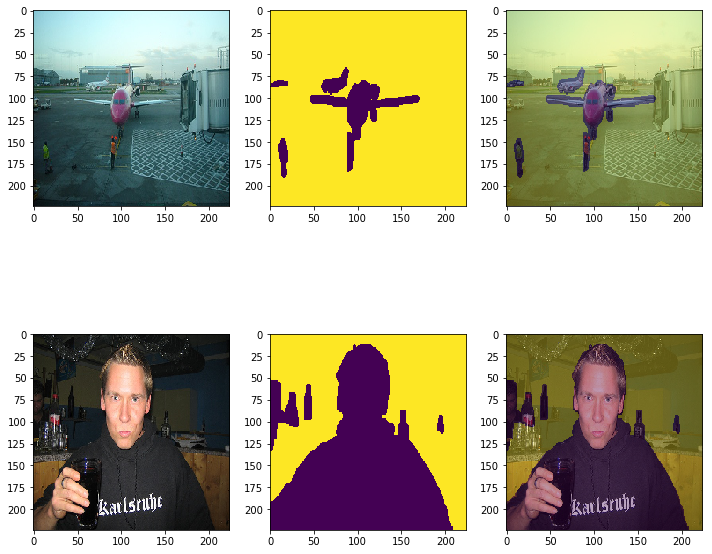

In [30]:
path = "data/training_data/"
image_name = "2007_000032"
x_image = path + "x/" + image_name + ".jpg"
y_image = path + "y_segmentation_class/" + image_name + ".png"

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

y_train_show = y_train[:,:,:,0]

fig, axs = plt.subplots(2,3,figsize=(10,10))
axs[0, 0].imshow((x_train[0]).astype(np.uint8))
axs[0, 1].imshow(y_train_show[0])
axs[0, 2].imshow((x_train[0]).astype(np.uint8))
axs[0, 2].imshow(y_train_show[0], alpha=0.35)
axs[1, 0].imshow((x_train[5]).astype(np.uint8))
axs[1, 1].imshow(y_train_show[5])
axs[1, 2].imshow((x_train[5]).astype(np.uint8))
axs[1, 2].imshow(y_train_show[5], alpha=0.35)
fig.tight_layout()

In [4]:
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
print("Input shape with samples:", x_train.shape)                                                       
print("Input shape:", input_shape)

output_shape = (y_train.shape[1], y_train.shape[2], y_train.shape[3])
print("Output shape with samples:", y_train.shape)
print("Output shape:", output_shape)

Input shape with samples: (1464, 224, 224, 3)
Input shape: (224, 224, 3)
Output shape with samples: (1464, 224, 224, 21)
Output shape: (224, 224, 21)


In [5]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
import pandas as pd 
warnings.filterwarnings("ignore")


print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__)); del keras
print("tensorflow version {}".format(tf.__version__))

python 3.6.1 | packaged by conda-forge | (default, May 23 2017, 14:31:56) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
keras version 2.3.0
tensorflow version 1.14.0


In [8]:
VGG_Weights_path = "vgg16_weights.h5"

def FCN8( nClasses ,  input_height=224, input_width=224):
    ## input_height and width must be devisible by 32 because maxpooling with filter size = (2,2) is operated 5 times,
    ## which makes the input_height and width 2^5 = 32 times smaller
    assert input_height%32 == 0
    assert input_width%32 == 0
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3)) ## Assume 224,224,3
    
    ## Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    f1 = x
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
    pool3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)## (None, 14, 14, 512) 

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(pool4)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)## (None, 7, 7, 512)

    #x = Flatten(name='flatten')(x)
    #x = Dense(4096, activation='relu', name='fc1')(x)
    # <--> o = ( Conv2D( 4096 , ( 7 , 7 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(4096, activation='relu', name='fc2')(x)
    # <--> o = ( Conv2D( 4096 , ( 1 , 1 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)   
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(1000 , activation='softmax', name='predictions')(x)
    # <--> o = ( Conv2D( nClasses ,  ( 1 , 1 ) ,kernel_initializer='he_normal' , data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    
    vgg  = Model(  img_input , pool5  )
    vgg.load_weights(VGG_Weights_path) ## loading VGG weights for the encoder parts of FCN8
    
    n = 4096
    o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    
    ## 4 times upsamping for pool4 layer
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    ## (None, 224, 224, 10)
    ## 2 times upsampling for pool411
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)
    
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)
        
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)
    
    model = Model(img_input, o)

    return model

model = FCN8(nClasses     = 21,  
             input_height = 224, 
             input_width  = 224)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [14]:
from keras import optimizers


sgd = optimizers.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


hist1 = model.fit(x_train,y_train,
                  validation_data=(x_val,y_val),
                  batch_size=128,epochs=10,verbose=2)

Train on 1464 samples, validate on 1449 samples
Epoch 1/10
 - 3681s - loss: 7.2810 - accuracy: 0.5320 - val_loss: 7.2952 - val_accuracy: 0.5310
Epoch 2/10


KeyboardInterrupt: 

In [235]:
from keras import models
import image_preprocessing as cig

print("Loading model...")

model = models.load_model("Model.h5")

print("Model loaded")



Loading model...


ValueError: Cannot create group in read-only mode.

In [173]:
path_to_test_image = "data2/test_frames/"
image_name = "2008_000012"

x_image = path_to_test_image + image_name + ".jpg"

test_image = cig.get_input(path_to_test_image, image_name)
x_test = []
x_test.append(test_image)

path_to_test_image = "data2/test_frames/"
image_name = "2008_000030"

x_image = path_to_test_image + image_name + ".jpg"

test_image = cig.get_input(path_to_test_image, image_name)
x_test.append(test_image)

x_test = np.array(x_test)



predicted = model.predict(x_test, verbose=1)


2/2 [==============================] - 1s 493ms/step


In [226]:
output = np.zeros((2, 224,224))
distributions = np.zeros((2, 22)).astype(int)


for index, _ in np.ndenumerate(output):
    sample = index[0]
    width = index[1]
    height = index[2]
    class_index = np.argmax(predicted[sample, width, height])
    output[sample, width, height] = class_index
    distributions[sample][class_index] += 1
    
output_colored = np.zeros((2, 224, 224, 3))
for index, _ in np.ndenumerate(output):
    sample = index[0]
    width = index[1]
    height = index[2]
    class_index = output[sample, width, height]
    rgb_array = custom_colormapping[class_index]
    output_colored[sample, width, height, 0] = rgb_array[0]
    output_colored[sample, width, height, 1] = rgb_array[1]
    output_colored[sample, width, height, 2] = rgb_array[2]

#index = np.arange(len(distributions[1]))
#plt.bar(index, distributions[1])
#plt.xlabel('Class', fontsize=10)
#plt.ylabel('No of pixels classified', fontsize=10)
#plt.xticks(index, classes, fontsize=5, rotation=30)
#plt.title('Distribution of predicted classes in image')
#plt.show()


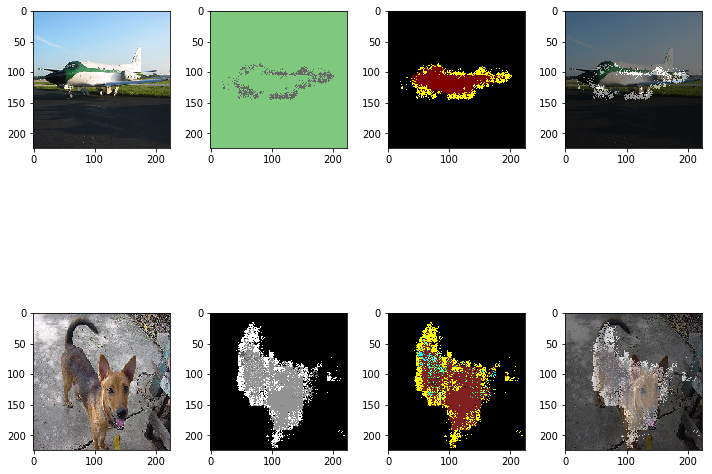

In [231]:
fig, axs = plt.subplots(2,4,figsize=(10,10))
axs[0,0].imshow((x_test[0]).astype(np.uint8))
axs[0,1].imshow((output[0].astype(np.uint8)), cmap="Accent")
axs[0,2].imshow((output_colored[0].astype(np.uint8)))
axs[0,3].imshow((x_test[0]).astype(np.uint8))
axs[0,3].imshow((output[0].astype(np.uint8)), cmap="gray", alpha=0.5)
axs[1,0].imshow((x_test[1]).astype(np.uint8))
axs[1,1].imshow((output[1].astype(np.uint8)), cmap="gray")
axs[1,2].imshow((output_colored[1].astype(np.uint8)))
axs[1,3].imshow((x_test[1]).astype(np.uint8))
axs[1,3].imshow((output[1].astype(np.uint8)), cmap="gray", alpha=0.5)
fig.tight_layout()